In [ ]:
!pip install scikit-learn pandas matplotlib seaborn --quiet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
csv_link = "https://drive.google.com/uc?export=download&id=1RfDP3sOk6Ce5sIP-F1ayd3WsH0hwdEf9"
df = pd.read_csv(csv_link)

print("Dataset Loaded. Shape:", df.shape)
print(df.head())

Dataset Loaded. Shape: (111, 73)
            Timestamp     Age  \
0  8/27/2025 11:13:12  Age-21   
1  8/27/2025 13:19:21  Age-19   
2  8/27/2025 13:20:10  Age-20   
3  8/27/2025 13:21:56  Age-22   
4  8/27/2025 13:23:18  Age-21   

  Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n           don't provide like 120.64)  \
0                                                120                                                                                          
1                                                167                                                                                          
2                                                167                                                                                          
3                                                170                                                                                          
4                                             167 cm 

In [ ]:
features = ["Movie_genre_top1", "  Series_genre_top1  ",
            "  Binge frequency per week  ", "  Screen Time Movies/series in hours per week  \n(Provide value between 0-40)"]
target = "Ott Top1"

# Print the column names to inspect them
print(df.columns)

X = df[features].copy()
y = df[target].copy()

Index(['Timestamp', 'Age',
       'Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n           don't provide like 120.64)',
       'Weight\nRange should be between 30 - 150 kg', 'Cuisine_top1',
       'Cuisine_top2', 'Cuisine_top3', 'Spice Tolerance', 'Dietary Preference',
       'Eating Out Per week',
       'Food Budget per meal Note: Provide integer value for eg like-199',
       'Sweet tooth level (1 is low and 5 is high)', 'Tea vs Coffee',
       'Movie_genre_top1', '  Movie_genre_top2  ', '  Movie_genre_top3 ',
       '  Series_genre_top1  ', '  Series_genre_top2  ',
       '  Series_genre_top3  ', '  Content_lang_top1  ',
       '  Content_lang_top2  ', '  Content_lang_top3  ', 'Ott Top1',
       'Ott Top2', 'Ott Top3', '  Binge frequency per week  ',
       '  Screen Time Movies/series in hours per week  \n(Provide value between 0-40)',
       '  Gaming days per week  ',
       '  Gaming hours per week  \n(Provide Values in int

In [21]:
label_encoders = {}
# Strip whitespace from column names
df.columns = df.columns.str.strip()

features = ["Movie_genre_top1", "Series_genre_top1",
            "Binge frequency per week", "Screen Time Movies/series in hours per week  \n(Provide value between 0-40)"]
target = "Ott Top1"

X = df[features].copy()
y = df[target].copy()


for col in ["Movie_genre_top1", "Series_genre_top1"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (88, 4)
Testing data shape: (23, 4)


--- Original Data Value Counts ---

'Movie_genre_top1':
Movie_genre_top1
Thriller       29
Action         26
Comedy         12
Scie-fi        12
Horror         10
Romance        10
Animation       6
Drama           5
Documentary     1
Name: count, dtype: int64

'Series_genre_top1':
Series_genre_top1
Crime         50
Anime         21
Historical    16
Fantasy       14
K-Drama        4
Teen           3
Siticom        3
Name: count, dtype: int64

'Binge frequency per week':
Binge frequency per week
2    28
3    17
1    17
0    15
5    14
4    12
7     6
6     2
Name: count, dtype: int64

'Screen Time Movies/series in hours per week  
(Provide value between 0-40)':
Screen Time Movies/series in hours per week  \n(Provide value between 0-40)
10             16
30             11
5              10
2               6
3               6
20              6
15              5
14              4
25              4
40              4
1               3
4               3
35              2
0               2
24 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


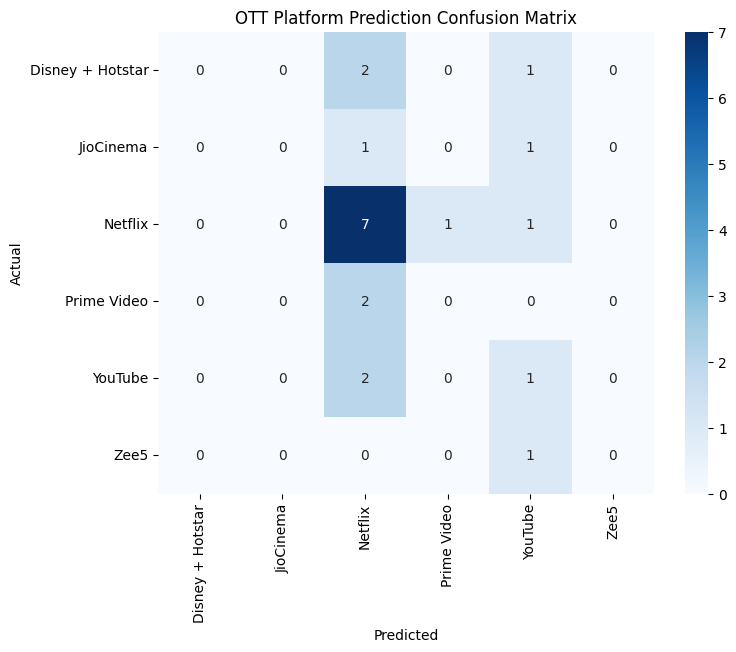


 Example Prediction: Netflix


In [31]:
# Ensure necessary imports are present
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Assume df is already loaded from the previous cell

# Strip whitespace from column names
df.columns = df.columns.str.strip()

features = ["Movie_genre_top1", "Series_genre_top1",
            "Binge frequency per week", "Screen Time Movies/series in hours per week  \n(Provide value between 0-40)"]
target = "Ott Top1"

X = df[features].copy()
y = df[target].copy()

print("--- Original Data Value Counts ---")
for col in features:
    print(f"\n'{col}':")
    print(X[col].value_counts(dropna=False))


# Clean the 'Screen Time Movies/series in hours per week  \n(Provide value between 0-40)' column
def clean_screen_time(value):
    if isinstance(value, str):
        value = value.lower().replace('hrs', '').replace('hr', '').strip()
        if 'to' in value:
            try:
                low, high = value.split('to')
                return (int(low.strip()) + int(high.strip())) / 2
            except ValueError:
                return np.nan # Handle cases where conversion fails
        try:
            return int(value)
        except ValueError:
            return np.nan # Handle other non-numeric strings
    return value

X['Screen Time Movies/series in hours per week  \n(Provide value between 0-40)'] = X['Screen Time Movies/series in hours per week  \n(Provide value between 0-40)'].apply(clean_screen_time)

# Convert 'Binge frequency per week' to numeric
X['Binge frequency per week'] = pd.to_numeric(X['Binge frequency per week'], errors='coerce')


print("\n--- Data Value Counts After Cleaning ---")
for col in features:
    print(f"\n'{col}':")
    print(X[col].value_counts(dropna=False))

# Drop rows with NaN values created by cleaning
# Keep original indices before dropping NaNs to align y
original_indices = X.index
X.dropna(inplace=True)
y = y[X.index] # Align y with X after dropping rows

print("\nShape of X after cleaning and dropping NaNs:", X.shape)
print("Shape of y after cleaning and dropping NaNs:", y.shape)


# Encode categorical features and the target variable
label_encoders = {}
for col in ["Movie_genre_top1", "Series_genre_top1"]:
    le = LabelEncoder()
    # Only fit on non-null values
    non_null_values = X.loc[X[col].notnull(), col].astype(str)
    if not non_null_values.empty:
      X.loc[X[col].notnull(), col] = le.fit_transform(non_null_values)
      label_encoders[col] = le
    else:
        # Handle the case where the column is all null after cleaning if necessary
        pass


target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)


# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


# Step 6: Train Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate Model
y_pred = model.predict(X_test)

print("\n Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Step 8: Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("OTT Platform Prediction Confusion Matrix")
plt.show()

# Step 9: Example Prediction
# Select a row from the *cleaned* X_test for prediction
if not X_test.empty:
    sample = X_test.iloc[[0]]
    predicted_ott = target_encoder.inverse_transform(model.predict(sample))
    print("\n Example Prediction:", predicted_ott[0])
else:
    print("\n Cannot make example prediction as X_test is empty after cleaning.")